# 0.0 Imports

In [1]:
import numpy              as np
import pandas             as pd
import seaborn            as sns
import plotly.express     as px
import matplotlib.pyplot  as plt

import folium
import geopandas

from datetime             import datetime
from streamlit_folium     import folium_static
from folium.plugins       import MarkerCluster
from IPython.core.display import HTML
from IPython.display      import Image

## 0.1 Helper Functions

In [2]:
def personal_settings():
    
    # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 8
    
    # notebook settings
    display(HTML('<style>.container{width:98% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

    # seaborn settings
    sns.set(rc={'figure.figsize':(22,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.2)

In [3]:
personal_settings();

## 0.2 Loading Data

In [4]:
df_raw = pd.read_csv('datasets/kc_house_data.csv')

# 1.0 Data Description

In [5]:
df1 = df_raw.copy()
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## 1.1 Rename Columns

In [6]:
print(df1.columns)

df1 = df1.rename(columns={'price': 'buying_price'})

df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Index(['id', 'date', 'buying_price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.2 Data Dimensions

In [7]:
print(df1.shape[0], 'rows')
print(df1.shape[1], 'columns')

21613 rows
21 columns


## 1.3 Data Types

In [8]:
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].dtypes,
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=description, columns=['attributes','dtypes', 'nunique','sample'])

,attributes,dtypes,nunique,sample
0,id,int64,21436,"[3885801450, 6792200282]"
1,date,object,372,"[20150402T000000, 20141028T000000]"
2,buying_price,float64,4028,"[541000.0, 726500.0]"
3,bedrooms,int64,13,"[8, 1]"
4,bathrooms,float64,30,"[4.75, 1.75]"
5,sqft_living,int64,1038,"[2195, 2473]"
6,sqft_lot,int64,9782,"[8814, 4810]"
7,floors,float64,6,"[3.0, 1.0]"
8,waterfront,int64,2,"[1, 0]"
9,view,int64,5,"[1, 2]"


## 1.4 Check NA

In [9]:
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].isna().sum(),
        round((df1[i].isna().sum()/len(df1))*100)
    ])

pd.DataFrame(data=description, columns=['attributes','null', '%null'])

,attributes,null,%null
0,id,0,0
1,date,0,0
2,buying_price,0,0
3,bedrooms,0,0
4,bathrooms,0,0
5,sqft_living,0,0
6,sqft_lot,0,0
7,floors,0,0
8,waterfront,0,0
9,view,0,0


## 1.5 Fillout NA

In [10]:
# nothing to fill

## 1.6 Change Data Types

In [11]:
# changing 'date' type from OBJECT to DATE
df1['date'] = pd.to_datetime(df1['date'])

#checking 'date' type
display(df1[['date']].head())
display(df1[['date']].dtypes)

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18


date    datetime64[ns]
dtype: object

## 1.7 Check Duplicates

In [12]:
print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.duplicated('id').sum(), '  duplicate ids')

21613 number of rows
21436 uniques ids
177   duplicate ids


## 1.8 Drop Duplicates

In [13]:
# sorting dataframe by date
df1 = df1.sort_values('date', ascending=True)

# deleting ids that appears first
df1 = df1.drop_duplicates(subset='id', keep='last')

print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.duplicated('id').sum(), '    duplicate ids')

21436 number of rows
21436 uniques ids
0     duplicate ids


## 1.9 Descriptive Statistical

In [14]:
qnt1_attributes = df1[['buying_price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long']]
cat1_attributes = df1[['yr_built', 'yr_renovated', 'waterfront', 'view', 'condition', 'grade','zipcode']]

### 1.9.1 Quantitative Attributes

In [15]:
# count, mean, std, min, quartile 1 (25%), quartile 2(50%), quartile 3 (75%) and max
qnt1_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
buying_price,21436.00,541649.96,367314.93,75000.00,324866.00,450000.00,645000.00,7700000.00
bedrooms,21436.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21436.00,2.12,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21436.00,2082.70,919.15,290.00,1430.00,1920.00,2550.00,13540.00
sqft_lot,21436.00,15135.64,41538.62,520.00,5040.00,7614.00,10696.25,1651359.00
floors,21436.00,1.50,0.54,1.00,1.00,1.50,2.00,3.50
sqft_above,21436.00,1790.96,829.03,290.00,1200.00,1560.00,2220.00,9410.00
sqft_basement,21436.00,291.74,442.78,0.00,0.00,0.00,560.00,4820.00
sqft_living15,21436.00,1988.31,685.70,399.00,1490.00,1840.00,2370.00,6210.00
sqft_lot15,21436.00,12785.96,27375.47,651.00,5100.00,7620.00,10087.25,871200.00


### 1.9.2 Categorical Attributes

The qualitative attributes yr_built, yr_renovated, view, condition, grade and zipcode are ordinal, i.e. they express some sort of ordering.

In [16]:
# min, max, uniques, mode and mode frequency
min_value = pd.DataFrame(cat1_attributes.apply(np.min)).rename(columns = {0: 'min'}).astype(str)
max_value = pd.DataFrame(cat1_attributes.apply(np.max)).rename(columns = {0: 'max'}).astype(str)

cat1_summary = cat1_attributes.astype('category').describe().T.drop(columns = 'count').rename(columns = {'top': 'mode', 'freq': 'mode freq'}).astype(str)
cat1_summary = pd.concat([min_value, max_value, cat1_summary], axis=1)
cat1_summary

,min,max,unique,mode,mode freq
yr_built,1900,2015,116,2014,559
yr_renovated,0,2015,70,0,20526
waterfront,0,1,2,0,21273
view,0,4,5,0,19320
condition,1,5,5,3,13911
grade,1,13,12,7,8896
zipcode,98001,98199,70,98103,600


# 2.0 Data Filtering

In [17]:
df2 = df1.copy()

### 2.1 Check for filtering

Check bedrooms and bathrooms.

In [18]:
display(df2[['bedrooms', 'bathrooms']].describe())

,bedrooms,bathrooms
count,21436.00,21436.00
mean,3.37,2.12
std,0.93,0.77
min,0.00,0.00
25%,3.00,1.75
50%,3.00,2.25
75%,4.00,2.50
max,33.00,8.00


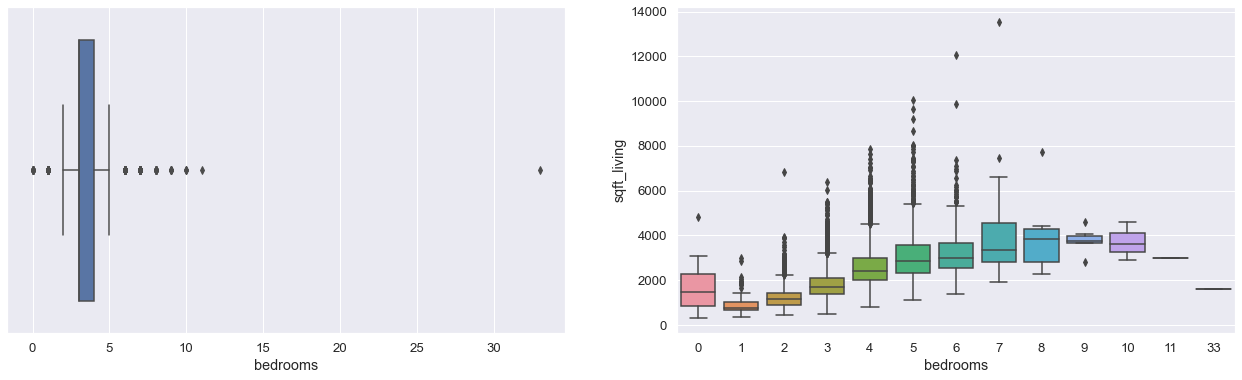

In [19]:
plt.figure(figsize=(22, 6))

plt.subplot(1,2,1)
sns.boxplot(x = 'bedrooms',  data=df2)

plt.subplot(1,2,2)
sns.boxplot(x = 'bedrooms', y='sqft_living', data=df2);

There is just one property with a bedroom equal to 33. The property has a small area to have 33 bedrooms.   
There is only one property with 11 bedrooms. The property has an area of 3000 square feet. Although it is unusual, it is possible for a property of this size to have 11 bedrooms.

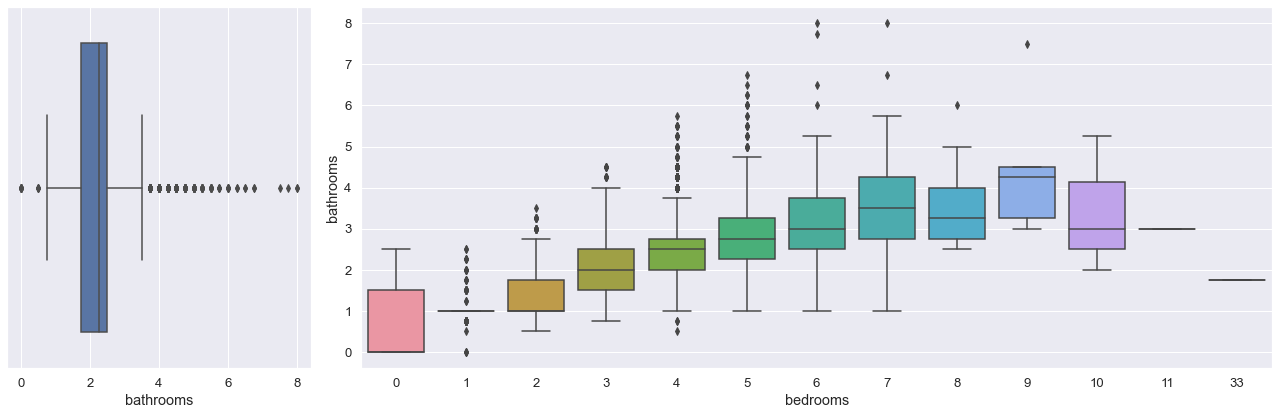

In [20]:
# specify plot layouts with different width using subplots()
fig, axs = plt.subplots(1,2, figsize=(18, 6), gridspec_kw=dict(width_ratios=[1,3]))

sns.boxplot(x = 'bathrooms',  data=df2, ax=axs[0])
sns.boxplot(x = 'bedrooms', y='bathrooms', data=df2, ax=axs[1])

fig.tight_layout()
plt.show()

For bathrooms, 0.5 is a room with a toilet but no shower, 0.75 is a bathroom that has either a shower or tub with sink and toilet, and 1 a bathroom that has shower and tub with sink and toilet (https://www.badeloftusa.com/buying-guides/bathrooms).       
Properties with bathrooms less than 0.75 were considered commercial properties. The house rocket company only works with residential properties.    
There are some properties with zero bedrooms, but bathrooms more than 0.75. These properties were considered residential properties studio-type.

### 2.2 Data Filtering

In [21]:
df2 = df2[(df2['bathrooms'] >= 0.75) & (df2['bedrooms'] != 33)]

# checking the filtering
print(f"Min. number of bathrooms: {df2['bathrooms'].min()}")
print(f"Max. number of bedrooms : {df2['bedrooms'].max()}")

Min. number of bathrooms: 0.75
Max. number of bedrooms : 11


# 3.0 Feature engineering

In [22]:
df3 = df2.copy()

## 3.1 Mind Map

## 3.2 Hypotesis List

## 3.3 Features Creation

# 4.0 Exploratory Data Analysis

## 4.1 Univariate Analysis

## 4.2 Bivariate Analysis

## 4.3 Multivatiate Analysis

# 5.0 Conclusion and Visualization